#Load Data

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/CNN_Articels_clean.csv')

#Exploratory Data Analysis

In [ ]:
print('Shape: ', dataset.shape)

Shape:  (4076, 11)


In [ ]:
print('Columns: ', dataset.columns)

Columns:  Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB


In [ ]:
# The columns with text are by default marked as Object datatype by Pandas.
# But Object dtype have a much broader scope. They can not only include strings, but also any other data that Pandas doesn't understand.
# When a column is Object type, it does not necessarily mean that all the values will be string.
# In fact, they can all be numbers, or a mixture of string, integers and floats. 
# With the new String dtype, the values are explicitly treated as strings.

dataset['Author'] = dataset['Author'].astype('string')
dataset['Date published'] = dataset['Date published'].astype('datetime64[ns]')
dataset['Category'] = dataset['Category'].astype('category')
dataset['Section'] = dataset['Section'].astype('category')
dataset['Url'] = dataset['Url'].astype('string')
dataset['Headline'] = dataset['Headline'].astype('string')
dataset['Description'] = dataset['Description'].astype('string')
dataset['Keywords'] = dataset['Keywords'].astype('string')
dataset['Second headline'] = dataset['Second headline'].astype('string')
dataset['Article text'] = dataset['Article text'].astype('string')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            4076 non-null   int64         
 1   Author           4076 non-null   string        
 2   Date published   4076 non-null   datetime64[ns]
 3   Category         4076 non-null   category      
 4   Section          4076 non-null   category      
 5   Url              4076 non-null   string        
 6   Headline         4076 non-null   string        
 7   Description      4076 non-null   string        
 8   Keywords         4076 non-null   string        
 9   Second headline  4076 non-null   string        
 10  Article text     4076 non-null   string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 296.2 KB


#Handle Missing Data

In [ ]:
print("Null Values: ", dataset.isnull().sum())
#dataset.dropna(inplace=True)

Null Values:  Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64


#Remove Duplicates

In [ ]:
dataset.Url.value_counts()  # Url is identifying value and because of that duplicate are not allowed

https://www.cnn.com/2021/07/14/world/tusimple-autonomous-truck-spc-intl/index.html                                          1
https://www.cnn.com/2022/03/14/tech/meta-guidance-heads-of-state/index.html                                                 1
https://www.cnn.com/2021/04/01/football/trkgc-munich-football-turkey-germany-immigrant-far-right-cmd-spt-intl/index.html    1
https://www.cnn.com/2022/03/02/business/companies-pulling-back-russia-ukraine-war-intl-hnk/index.html                       1
https://www.cnn.com/2021/06/15/asia/swarm-robots-hong-kong-warehouse-hnk-spc-intl/index.html                                1
                                                                                                                           ..
https://www.cnn.com/2021/12/01/football/england-women-latvia-world-cup-qualifier-spt-intl/index.html                        1
https://www.cnn.com/2021/12/01/football/suk-hyun-jun-racial-abuse-spt-intl/index.html                                 

In [ ]:
# In case of duplicate
#dataset.drop_duplicates(subset=['Url'], keep="first", inplace=True)
#dataset['Url'].value_counts()

#Dataset Overview

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [ ]:
print('Category: ', dataset.Category.unique())

Category:  ['news', 'business', 'health', 'entertainment', 'sport', 'politics']
Categories (6, object): ['business', 'entertainment', 'health', 'news', 'politics', 'sport']


In [ ]:
print('Section: ', dataset.Section.unique())

Section:  ['world', 'asia', 'investing', 'business', 'media', ..., 'india', 'weather', 'intl_world', 'uk', 'australia']
Length: 37
Categories (37, object): ['africa', 'americas', 'asia', 'australia', ..., 'uk', 'us', 'weather',
                          'world']


In [ ]:
# Author, Url, Keywords, etc column can contain the Category/Section name and can cause data leakage in classification
# Data Leakage - Data leakage is one of the major problems in machine learning which occurs when the data 
# that we are using to train an ML algorithm has the information the model is trying to predict. 
# It is a situation that causes unpredictable and bad prediction outcomes after model deployment.
import re
def fix_author(text):

    # Lowercasing
    text_clean = text.lower()

    # Remove Category/Section to avoid data leakage
    remove_words = []
    remove_words.extend(dataset.Category.unique())
    remove_words.extend(dataset.Section.unique())
    # more words to remove 
    remove_words.extend(['CNN','By'])
    remove_words = [word.lower() for word in remove_words]
    text_clean = ' '.join([word for word in text_clean.split() if word not in remove_words])
    
    #split names
    authors = re.split(',| and',text_clean)
    
    # Remove special characters and numbers
    authors = [re.sub(r'[^a-z]', ' ', author) for author in authors]
    # concat name with ','
    authors = ", ".join(authors)

    return authors

In [ ]:
# Date published contains the time of publishing - not relevant data 
dataset['year'] = dataset['Date published'].dt.year
dataset['Date published'] = dataset['Date published'].dt.date
dataset['Date published']

0       2021-07-15
1       2021-05-12
2       2021-06-16
3       2022-03-15
4       2022-03-15
           ...    
4071    2021-12-01
4072    2021-12-01
4073    2021-12-01
4074    2021-12-01
4075    2021-12-01
Name: Date published, Length: 4076, dtype: object

In [ ]:
import spacy
from string import punctuation
nlp = spacy.load("en_core_web_sm")
# Load English tokenizer, tagger, parser and NER

def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN','VERB'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    text_clean = " ".join(result)
    return text_clean

In [ ]:
# Fix all the text in the dataset
for index in dataset.index:
    
    text_author = dataset.loc[index,'Author']
    dataset.loc[index,'Author'] = fix_author(text_author)
    
    text_headline = dataset.loc[index,'Headline']
    dataset.loc[index,'Headline'] = get_hotwords(text_headline)
    
    text_headline2 = dataset.loc[index,'Second headline']
    dataset.loc[index,'Second headline'] = get_hotwords(text_headline2)
    
    text_description = dataset.loc[index,'Description']
    dataset.loc[index,'Description'] = get_hotwords(text_description)
    
    text_article = dataset.loc[index,'Article text']
    dataset.loc[index,'Article text'] = get_hotwords(text_article)

In [ ]:
dataset.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple thinks solution dri...,e commerce boom exacerbated global truck drive...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple thinks solution dri...,cnn)right shortage truck drivers exacerbated e...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand protect factory work...,working factory mean task lead chronic injury ...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand protect factory workers injuries,cnn)working factory warehouse mean task repeti...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots gets smarter works cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots gets smarter works,cnn)in hong kong warehouse swarm autonomous ro...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia option investors emerging markets cnn,years world popular emerging markets called br...,"investing, Russia is no longer an option for i...",russia option investors emerging markets,new york cnn business)for years world popular ...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban new eu sanctions...,european union approved tuesday new barrage sa...,"business, Russian energy investment ban part o...",eu bans investment russian energy new sanction...,european union approved tuesday new barrage sa...,2022


#Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple thinks solution dri...,e commerce boom exacerbated global truck drive...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple thinks solution dri...,cnn)right shortage truck drivers exacerbated e...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand protect factory work...,working factory mean task lead chronic injury ...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand protect factory workers injuries,cnn)working factory warehouse mean task repeti...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots gets smarter works cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots gets smarter works,cnn)in hong kong warehouse swarm autonomous ro...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia option investors emerging markets cnn,years world popular emerging markets called br...,"investing, Russia is no longer an option for i...",russia option investors emerging markets,new york cnn business)for years world popular ...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban new eu sanctions...,european union approved tuesday new barrage sa...,"business, Russian energy investment ban part o...",eu bans investment russian energy new sanction...,european union approved tuesday new barrage sa...,2022


In [ ]:
dataset.Category.value_counts()

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: int64

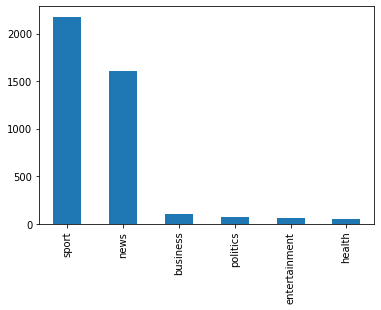

In [ ]:
dataset.Category.value_counts().plot(kind='bar');

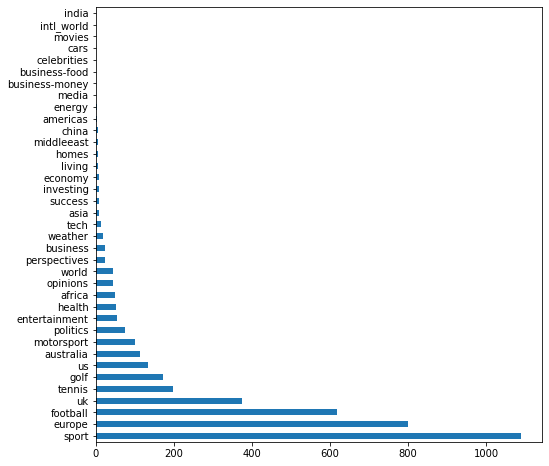

In [ ]:
dataset['Section'].value_counts().plot(kind='barh', figsize=(8, 8));

In [ ]:
dataset['year'].value_counts()

2021    3400
2022     299
2018      97
2020      75
2015      68
2016      34
2013      34
2017      29
2019      28
2014       6
2012       6
Name: year, dtype: int64

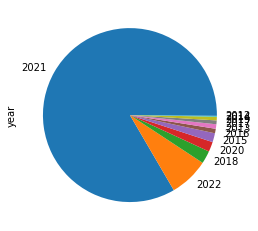

In [ ]:
dataset['year'].value_counts().plot(kind='pie');

In [ ]:
dataset.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,year
0,0,"jacopo prisco,",2021-07-15,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple thinks solution dri...,e commerce boom exacerbated global truck drive...,"world, There's a shortage of truckers, but TuS...",shortage truckers tusimple thinks solution dri...,cnn)right shortage truck drivers exacerbated e...,2021
1,2,"stephanie bailey,",2021-05-12,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand protect factory work...,working factory mean task lead chronic injury ...,"world, Bioservo's robotic 'Ironhand' could pro...",robotic ironhand protect factory workers injuries,cnn)working factory warehouse mean task repeti...,2021
2,3,"words stephanie bailey, video zahra jamshed",2021-06-16,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots gets smarter works cnn,hong kong warehouse swarm autonomous robots wo...,"asia, This swarm of robots gets smarter the mo...",swarm robots gets smarter works,cnn)in hong kong warehouse swarm autonomous ro...,2021
3,4,"paul r la monica,",2022-03-15,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,russia option investors emerging markets cnn,years world popular emerging markets called br...,"investing, Russia is no longer an option for i...",russia option investors emerging markets,new york cnn business)for years world popular ...,2022
4,7,reuters,2022-03-15,business,business,https://www.cnn.com/2022/03/15/business/russia...,russian energy investment ban new eu sanctions...,european union approved tuesday new barrage sa...,"business, Russian energy investment ban part o...",eu bans investment russian energy new sanction...,european union approved tuesday new barrage sa...,2022


In [ ]:
print('Shape: ', dataset.shape)

Shape:  (4076, 12)


#Labeling

In [ ]:
# Category to number mapping
dataset['Category_code'] = dataset.Category
dataset['Category_code'] = dataset.Category.cat.codes

#Split train/test

In [ ]:
# sklearn - library for machine learning
# train_test_split - Split arrays or metrics into random train and test subsets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Article text'], 
                                                    dataset['Category_code'], 
                                                    test_size=0.20, 
                                                    random_state=8)

#Text Representation using TF-IDF Vectors as feature

In [ ]:
# TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features
# Represent words as Vectors 
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# encoding : str, default=’utf-8’, If bytes or files are given to analyze, this encoding is used to decode.
# ngram_range : tuple (min_n, max_n), default=(1, 1), The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# stop_words : {‘english’}, list, default=None, If None, no stop words will be used.
# lowercase : bool, default=True, Convert all characters to lowercase before tokenizing.
# max_df : float or int, default=1.0, When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.
# min_df : float or int, default=1, When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
# max_features : int, default=None, If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
# norm : {‘l1’, ‘l2’} or None, default='l2', Sum of squares of vector elements=1
# The cosine similarity between two vectors is their dot product when l2 norm has been applied.
# sublinear_tf : bool, default=False, Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# Transform documents to a matrix in train
features_train = tfidf.fit_transform(X_train).toarray() #used to compute the mean and std_dev for a given feature to be used further for scaling
labels_train = y_train
print(features_train.shape)

# Transform documents to a matrix in test
features_test = tfidf.transform(X_test).toarray() #used to perform scaling using mean and std_dev calculated using fit_transform() method
labels_test = y_test
print(features_test.shape)

(3260, 300)
(816, 300)


#Model

In [ ]:
# sklearn - library for machine learning
# SVM - support-vector machines - supervised learning models for classification
from sklearn import svm

# sklearn.metrics -  for evaluating the quality of a model’s predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# seaborn - library for statistical data visualization
import seaborn as sns

In [ ]:
# Default hyperparameters 
svc = svm.SVC(random_state=8)
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Fit the random search model
svc.fit(features_train, labels_train)

SVC(random_state=8)

#Prediction

In [ ]:
# Find the prediction on the test
svc_predict = svc.predict(features_test)
print("Accuracy score on train: ", accuracy_score(labels_train, svc.predict(features_train)))

Accuracy score on train:  0.9815950920245399


In [ ]:
# Classification report
print("Classification report: ")
print(classification_report(labels_test, svc_predict))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        20
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00        12
           3       0.89      0.98      0.94       326
           4       0.83      0.62      0.71        16
           5       0.97      0.98      0.98       430

    accuracy                           0.94       816
   macro avg       0.73      0.53      0.58       816
weighted avg       0.92      0.94      0.92       816



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


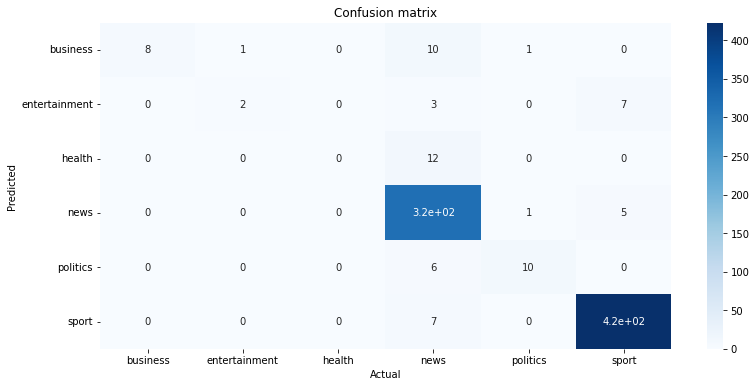

In [ ]:
# Confusion matrix - summary of prediction results on a classification problem
aux_df = dataset[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, svc_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()